In [18]:
import time, sys

# Import the Qiskit 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QiskitError
from qiskit import execute, IBMQ, BasicAer, transpiler, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.mapper import Layout

## Define your backend

In [19]:
from qiskit import IBMQ
# IBMQ.enable_account('<token>',url='<url>')

# check available backends
# print("Available backends:")
# IBMQ.backends()

import qiskit
backend = qiskit.Aer.get_backend('qasm_simulator')
#backend = IBMQ.get_backend('<your backend>')
print(backend)

qasm_simulator


## Define the UCCSD ansatz circuit

In [20]:
def get_ucc_ansatz(theta):
    circuit = QuantumCircuit(2, 2)
    circuit.x(0)
    circuit.ry(theta, 1)
    circuit.cx(1, 0)
    return circuit

## Define the naive measurement circuits
more automations can be done in here

In [21]:
def measure_zi(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=1000)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('10', 0) - counts.get('11', 0) - counts.get('01', 0))/1000


def measure_iz(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=1000)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0))/1000


def measure_xx(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.h(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=1000)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0))/1000


def measure_yy(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(1)
    circuit.sdg(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=1000)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0))/1000

def measure_hamiltonian(theta):
    return 5.9 + .22 * measure_zi(theta) - 6.1 * measure_iz(theta) - 2.14 * measure_xx(theta) - 2.14 * measure_yy(theta)

### run the experiment with different theta value

In [22]:
import numpy as np
values = []
for theta in np.arange(-np.pi, np.pi, 0.1):
    values.append(measure_hamiltonian(theta))

### plot the results

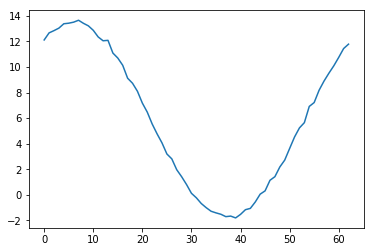

In [23]:
import matplotlib.pyplot as plt
plt.plot(values)
plt.show()

## Define the simultaneous measurement circuits
more automations can be done in here

In [24]:
def measure_zi_and_iz(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=1000)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    zi = (counts.get('00', 0) + counts.get('10', 0) - counts.get('11', 0) - counts.get('01', 0))/1000
    iz = (counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0))/1000
    return zi, iz

def measure_xx_and_yy(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.h(1)
    circuit.cx(1, 0)
    circuit.cz(0, 1)
    circuit.h(0)
    circuit.h(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=1000)
    #job_monitor(job)
    counts = job.result().get_counts(circuit)
    xx = (counts.get('00', 0) + counts.get('10', 0) - counts.get('11', 0) - counts.get('01', 0))/1000
    yy = (counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0))/1000
    return xx, yy

def measure_simultaneously_hamiltonian(theta):
    xx, yy = measure_xx_and_yy(theta)
    zi, iz = measure_zi_and_iz(theta)
    return 5.9 + .22 * zi - 6.1 * iz - 2.14 * xx - 2.14 * yy

### run the experiment with different theta value

In [25]:
values = []
for theta in np.arange(-np.pi, np.pi, 0.1):
    values.append(measure_simultaneously_hamiltonian(theta))

### plot the results

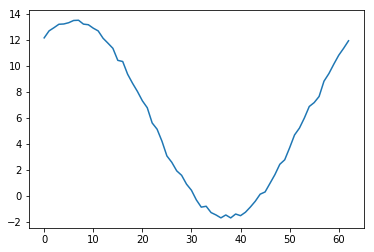

In [26]:
import matplotlib.pyplot as plt
plt.plot(values)
plt.show()